# 03-noisy-circle-gradient

> Start point : [docs.pytorch.org - beginner - Learning PyTorch with Examples](https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html)) dealing with polynomial estimation of sin(x)

Estimate circle parameters using gradient descent with symbolic differentiation (before testing autograd from pytorch).


t=0: cx=0.5979704869287812, cy=-0.15365154436128137, r=-0.08790910649384803, loss=192187.14885555947
t=1000: cx=1.8539772071795553, cy=2.586025724311991, r=-0.2624000700765305, loss=62757.051458602735
t=2000: cx=2.0075242730162612, cy=2.9260472127039403, r=-0.6992452436504486, loss=58890.51374206373
t=3000: cx=2.0281728913354296, cy=2.973605771802467, r=-1.7702365079146158, loss=46759.51905146575
t=4000: cx=2.027879851009403, cy=2.979551486690418, r=-3.553014111599851, loss=14874.394724690042
t=5000: cx=2.021192812509564, cy=2.9788170828446208, r=-4.668143856774733, loss=1177.489521497172
t=6000: cx=2.0150873795869373, cy=2.9774626715008066, r=-4.922736332283799, loss=363.629348562851
t=7000: cx=2.0119348543575213, cy=2.976693949372272, r=-4.961449199288179, loss=344.0852904885647
t=8000: cx=2.0106202116681753, cy=2.9763557961073808, r=-4.966901795304206, loss=343.6783841481726
t=9000: cx=2.010112791708373, cy=2.9762190044847894, r=-4.967664974375001, loss=343.6678349052596
Result: cx=

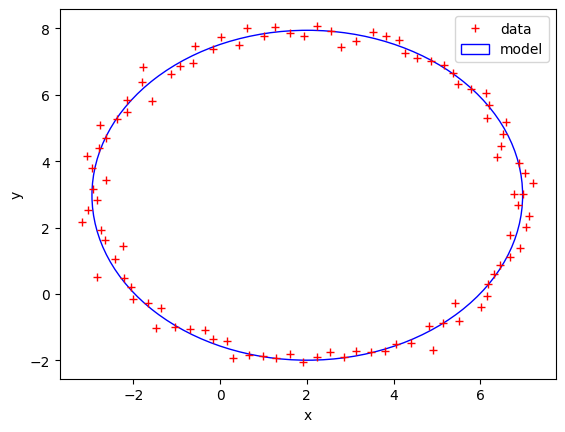

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt

# Create N points on circle with cx=2, cy=3 and r=5
N=100
theta = np.linspace(0., 2.0 * math.pi, N)
radius = 5. + 0.2 * np.random.randn(N)
x = 2 + radius * np.cos(theta)
y = 3 + radius * np.sin(theta)

# Randomly initialize params
cx = np.random.randn()
cy = np.random.randn()
r  = np.random.randn()

num_epoch=10000
learning_rate = 1e-7
for t in range(num_epoch):
    # Compute error
    # Ek = ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )^2
    deltas = np.square( x - cx ) + np.square( y - cy ) - np.square( r )
    loss = np.square(deltas).sum()
    if t % 1000 == 0:
        print(f't={t}: cx={cx}, cy={cy}, r={r}, loss={loss}')

    # Compute grads for each parameters using math (Symbolic Differentiation)
    # Note : autograd in PyTorch from aims at avoiding this (Automatic Differention)

    # dEk / dcx = - 4 * ( xk - cx ) * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    # dEk / dcy = - 4 * ( yk - cy ) * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    # dEk / dr  = - 4 * r  * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    grad_cx = ( -4 * ( x - cx ) * deltas ).sum()
    grad_cy = ( -4 * ( y - cy ) * deltas ).sum()
    grad_r  = ( -4 * r * deltas ).sum()

    # Update weights
    cx -= learning_rate * grad_cx
    cy -= learning_rate * grad_cy
    r  -= learning_rate * grad_r

print(f'Result: cx={cx}, cy={cy}, r={r}, loss={loss}')
# Plot results
plt.plot(x, y, 'r+', label='data')
plt.xlabel('x')
plt.ylabel('y')
circle = plt.Circle((cx, cy), r, color='b', fill=False, label='model')
plt.gcf().gca().add_artist(circle)
plt.legend()
plt.show()

